<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#プロビットモデル" data-toc-modified-id="プロビットモデル-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>プロビットモデル</a></span></li><li><span><a href="#ポワソン分布" data-toc-modified-id="ポワソン分布-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ポワソン分布</a></span></li><li><span><a href="#類題" data-toc-modified-id="類題-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>類題</a></span><ul class="toc-item"><li><span><a href="#不良品の予測" data-toc-modified-id="不良品の予測-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>不良品の予測</a></span></li><li><span><a href="#解" data-toc-modified-id="解-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>解</a></span></li></ul></li><li><span><a href="#交差項の検討" data-toc-modified-id="交差項の検討-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>交差項の検討</a></span><ul class="toc-item"><li><span><a href="#交差項の追加" data-toc-modified-id="交差項の追加-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>交差項の追加</a></span></li><li><span><a href="#余談:-2乗項" data-toc-modified-id="余談:-2乗項-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>余談: 2乗項</a></span></li></ul></li></ul></div>

## プロビットモデル

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [11]:
import pandas as pd
cancer_df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

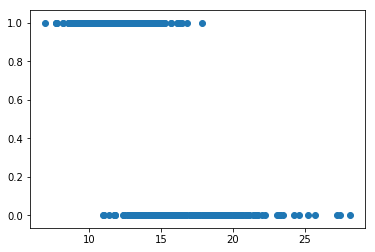

In [17]:
plt.scatter(cancer_df["mean radius"],cancer.target)

プロビットモデル

目的変数（被説明変数）の値が有限の範囲に収まるケース、つまり予測値が線形モデルではない場合に使う.


In [18]:
import statsmodels.api as sm

In [35]:
from statsmodels.discrete.discrete_model import Probit

https://jbhender.github.io/Stats506/F18/GP/Group14.html#languages

In [74]:
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/carData/Mroz.csv")
valid_data = data.drop(data.columns[0],axis=1)

In [75]:
valid_data["lfp"] = valid_data["lfp"]=="yes"
valid_data["hc"] = valid_data["hc"] == "yes"
valid_data["wc"] = valid_data["wc"]=="yes"

In [76]:
valid_data.head()

,lfp,k5,k618,age,wc,hc,lwg,inc
0,True,1,0,32,False,False,1.210165,10.910001
1,True,0,2,30,False,False,0.328504,19.500000
2,True,1,3,35,False,False,1.514128,12.039999
3,True,0,3,34,False,False,0.092115,6.800000
4,True,1,2,31,True,False,1.524280,20.100000


The data covers a sample of 753 married white women aged between 30 and 60 collected in 1975.

lfp: Labor-force participation of the married white woman

k5 : Number of children younger than 6 years old

k618: Number of children aged 6-18

age: age in years

wc : Wife's college attendance

hc : Husband's college attendance

lwg : Log expected wage rate for women in labor force

inc : family income without the wife's income

Our task is to identify whether certain characteristics of a woman’s household and personal life can predict her labor-force participation.



In [77]:
valid_data.describe()

,k5,k618,age,lwg,inc
count,753.000000,753.000000,753.000000,753.000000,753.000000
mean,0.237716,1.353254,42.537849,1.097115,20.128965
std,0.523959,1.319874,8.072574,0.587556,11.634799
min,0.000000,0.000000,30.000000,-2.054124,-0.029000
25%,0.000000,0.000000,36.000000,0.818086,13.025000
50%,0.000000,1.000000,43.000000,1.068403,17.700001
75%,0.000000,2.000000,49.000000,1.399717,24.466000
max,3.000000,8.000000,60.000000,3.218876,96.000000


In [95]:
y = valid_data["lfp"]
X = valid_data.drop(["lfp"],1)
X = sm.add_constant(X)
model = Probit(y,X.astype(float))

In [96]:
probit_model =model.fit()

Optimization terminated successfully.
         Current function value: 0.601189
         Iterations 5


In [103]:
probit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                    lfp   No. Observations:                  753
Model:                         Probit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sat, 07 Dec 2019   Pseudo R-squ.:                  0.1208
Time:                        18:11:23   Log-Likelihood:                -452.69
converged:                       True   LL-Null:                       -514.87
                                        LLR p-value:                 9.471e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9184      0.381      5.040      0.000       1.172       2.664
k5            -0.8747      0.114     -7.703      0.000      -1.097      -0.652
k618          -0.0386      0.040     -0.953      0.340      -0.118       0.041
age           -0.0378      0.008     -4.971      0.000      -0.053      -0.023
wc             0.4883      0.135      3.604      0.000       0.223       0.754
hc             0.0572      0.124      0.461      0.645      -0.186       0.300
lwg            0.3656      0.088      4.165      0.000       0.194       0.538
inc           -0.0205      0.005     -4.297      0.000      -0.030      -0.011
==============================================================================
"""

In [107]:
print(probit_model.get_margeff().summary())

       Probit Marginal Effects       
Dep. Variable:                    lfp
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
k5            -0.2997      0.034     -8.726      0.000      -0.367      -0.232
k618          -0.0132      0.014     -0.955      0.340      -0.040       0.014
age           -0.0130      0.002     -5.219      0.000      -0.018      -0.008
wc             0.1673      0.045      3.696      0.000       0.079       0.256
hc             0.0196      0.042      0.461      0.645      -0.064       0.103
lwg            0.1253      0.029      4.311      0.000       0.068       0.182
inc           -0.0070      0.002     -4.451      0.000      -0.010      -0.004


statsmodelsのProbitクラスはmargeffメソッドを持つ.
margeff()メソッドは各パラメータの限界効果（そのパラメータが一単位変化したときの目的変数への効果）を返す.

## ポワソン分布

+ ある事象が何回起きるかという偶然のメカニズムを表現する確率分布
+ なかなか起こりにくいことの確率分布を表現する

代表的な例としては

+ ある地域の一日の交通事故件数
+ ある会社の電話機に14時～15時にかかってくる電話の数
+ ある野球チームの1試合あたりのホームラン数

xを、単位空間内で生じるある現象の正規回数とし、xがポアソン分布に従うときxの確率分布は次のように書ける

(e.g, 例えば,x=3 はある範囲内でxが3回起きる確率)

$$
f(x) = \frac{\lambda^xe^{-\lambda}}{x!}
$$

$$
var(x) = \lambda,
E(x) = \lambda
$$

In [1]:
# 電話がかかってくる回数の予測

## 15時から16時の間に平均3回電話がかかってくるとき、同じ時間帯にN回電話がかかってくる確率を求められる.

## Xの期待値= lambda = 3

from scipy.stats import poisson
### 5回かかってくる確率
lam = 3
poisson.pmf(5,lam)*100


10.081881344492457

In [2]:
### 5回以上かかってくる確率
1 - poisson.cdf(4,lam)

0.1847367554762278

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

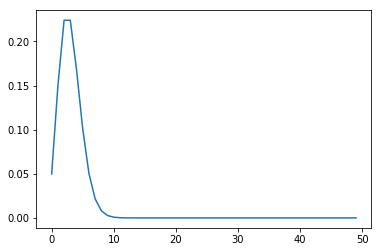

In [5]:
x = [i for i in range(50)]
plt.plot(x,poisson.pmf(x,lam))

## 類題

### 不良品の予測

製品Aを作る工場では平均して200個に1個の割合で不良品が発生します。

製造された製品Aを10個抜き取る時、この中に不良品が含まれる個数がポアソン分布に従うとすると、

不良品が1個含まれる（となる）確率はいくらでしょうか。

### 解

製品Aを作る工場では平均して200個に1個の割合で不良品が発生します。

つまり,商品が不良品である確率は1/200

製造された製品を10個抜き出したとき含まれる不良品は平均して1/200 * 10 = 0.05 = $\lambda$


In [9]:
lam_defective = 0.05
poisson.pmf(1,lam_defective)*100


4.756147122503571

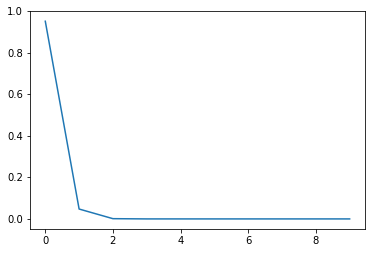

In [10]:
cnts_defective =[i for i in range(10)]
plt.plot(cnts_defective,poisson.pmf(cnts_defective,lam_defective))

## 交差項の検討

In [18]:
from sklearn.datasets import load_boston
import pandas as pd
import statsmodels.formula.api as smf

In [16]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)

### 交差項の追加
RM と DISの積であるRM_DISを交差項として追加する
交差項はある説明変数とべつの説明変数が相乗的に目的変数に影響を与えている仮説が立った場合に用いる.

In [19]:
boston_df["price"] = boston.target
boston_df["RM_DIS"] = boston_df["RM"] * boston_df["DIS"]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,RM_DIS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,26.891750
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,31.893749
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,35.688614
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,42.423276
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,43.326543


In [20]:
X = boston_df.drop("price",1)
y= boston.target
model = smf.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     828.7
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:02:18   Log-Likelihood:                -1523.0
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     492   BIC:                             3133.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0941      0.034     -2.733      0.007      -0.162      -0.026
ZN             0.0446      0.015      3.021      0.003       0.016       0.074
INDUS         -0.0087      0.065     -0.135      0.893      -0.135       0.118
CHAS           2.8810      0.904      3.188      0.002       1.105       4.657
NOX           -1.6037      3.508     -0.457      0.648      -8.496       5.289
RM             5.5541      0.431     12.875      0.000       4.707       6.402
AGE           -0.0063      0.014     -0.456      0.648      -0.033       0.021
DIS           -2.0802      0.916     -2.271      0.024      -3.880      -0.280
RAD            0.1579      0.068      2.338      0.020       0.025       0.291
TAX           -0.0092      0.004     -2.339      0.020      -0.017      -0.001
PTRATIO       -0.3304      0.121     -2.741      0.006      -0.567      -0.094
B              0.0153      0.003      5.644      0.000       0.010       0.021
LSTAT         -0.4077      0.051     -7.960      0.000      -0.508      -0.307
RM_DIS         0.1876      0.151      1.242      0.215      -0.109       0.484
==============================================================================
Omnibus:                      205.113   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1407.629
Skew:                           1.612   Prob(JB):                    2.17e-306
Kurtosis:                      10.508   Cond. No.                     8.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p値、t値を見ると、RMとDISの交差項は目的変数に統計的に有意な影響を与えていない.

### 余談: 2乗項
説明変数が大きくなるにしたがって、目的変数に与える影響が変化するという仮説を示すために用いる.

例えば、年齢と自給の関係がある。
年齢が高くなると時給は増加するが、増加幅は次第に減少し、いずれピークを迎えて減少に転じる場合が多い。
この場合は、年齢の2乗項を説明変数に追加するとモデルの精度が向上するかもしれない.